## **Name - Sarvesh Karanjkar(20210812002)**

## **BDA LAB 06**

## **Implementation of PageRank**

In [ ]:

%pylab notebook
import numpy as np
import numpy.linalg as la
np.set_printoptions(suppress=True)

Populating the interactive namespace from numpy and matplotlib


In [ ]:
L = np.array([[0,   1/2, 1/3, 0, 0,   0 ],
              [1/3, 0,   0,   0, 1/2, 0 ],
              [1/3, 1/2, 0,   1, 0,   1/2 ],
              [1/3, 0,   1/3, 0, 1/2, 1/2 ],
              [0,   0,   0,   0, 0,   0 ],
              [0,   0,   1/3, 0, 0,   0 ]])

In [ ]:
eVals, eVecs = la.eig(L) # Gets the eigenvalues and vectors
order = np.absolute(eVals).argsort()[::-1] # Orders them by their eigenvalues
eVals = eVals[order]
eVecs = eVecs[:,order]

r = eVecs[:, 0] # Sets r to be the principal eigenvector
100 * np.real(r / np.sum(r))

array([16.        ,  5.33333333, 40.        , 25.33333333,  0.        ,
       13.33333333])

In [ ]:
r = 100 * np.ones(6) / 6 # Sets up this vector (6 entries of 1/6 × 100 each)
r # Shows it's value

array([16.66666667, 16.66666667, 16.66666667, 16.66666667, 16.66666667,
       16.66666667])

In [ ]:
for i in np.arange(100) : # Repeat 100 times
    r = L @ r
r

array([16.        ,  5.33333333, 40.        , 25.33333333,  0.        ,
       13.33333333])

In [ ]:
r = 100 * np.ones(6) / 6 # Sets up this vector (6 entries of 1/6 × 100 each)
lastR = r
r = L @ r
i = 0
while la.norm(lastR - r) > 0.01 :
    lastR = r
    r = L @ r
    i += 1
print(str(i) + " iterations to convergence.")
r


18 iterations to convergence.


array([16.00149917,  5.33252025, 39.99916911, 25.3324738 ,  0.        ,
       13.33433767])

In [ ]:
 # We'll call this one L2, to distinguish it from the previous L.
L2 = np.array([[0,   1/2, 1/3, 0, 0,   0, 0 ],
               [1/3, 0,   0,   0, 1/2, 0, 0 ],
               [1/3, 1/2, 0,   1, 0,   0, 0 ],
               [1/3, 0,   1/3, 0, 1/2, 0, 0 ],
               [0,   0,   0,   0, 0,   0, 0 ],
               [0,   0,   1/3, 0, 0,   1, 0 ],
               [0,   0,   0,   0, 0,   0, 1 ]])

In [ ]:
r = 100 * np.ones(7) / 7 # Sets up this vector (7 entries of 1/7 × 100 each)
lastR = r
r = L2 @ r
i = 0
while la.norm(lastR - r) > 0.01 :
    lastR = r
    r = L2 @ r
    i += 1
print(str(i) + " iterations to convergence.")
r

46 iterations to convergence.


array([ 0.01077429,  0.00420324,  0.02131321,  0.01251789,  0.        ,
       85.66547709, 14.28571429])

In [ ]:
d = 0.5 # Feel free to play with this parameter after running the code once.
M = d * L2 + (1-d)/7 * np.ones([7, 7])

In [ ]:
r = 100 * np.ones(7) / 7 # Sets up this vector (6 entries of 1/6 × 100 each)
lastR = r
r = M @ r
i = 0
while la.norm(lastR - r) > 0.01 :
    lastR = r
    r = M @ r
    i += 1
print(str(i) + " iterations to convergence.")
r

8 iterations to convergence.


array([13.13619674, 11.11812027, 19.27885503, 14.33173875,  7.14285714,
       20.70651779, 14.28571429])

In [ ]:
def pageRank(linkMatrix, d) :
    n = linkMatrix.shape[0]
    M = d * linkMatrix + (1-d)/n * np.ones([n, n])
    r = 100 * np.ones(n) / n # Sets up this vector (n entries of 1/n × 100 each)
    last = r
    r = M @ r
    while la.norm(last - r) > 0.01 :
        last = r
        r = M @ r
    return r


def generate_internet(n) :
    c = np.full([n,n], np.arange(n))
    c = (abs(np.random.standard_cauchy([n,n])/2) > (np.abs(c - c.T) + 1)) + 0
    c = (c+1e-10) / np.sum((c+1e-10), axis=0)
    return c
generate_internet(5)


array([[1. , 1. , 0. , 0. , 0.2],
       [0. , 0. , 0. , 0. , 0.2],
       [0. , 0. , 0. , 0.5, 0.2],
       [0. , 0. , 0. , 0.5, 0.2],
       [0. , 0. , 1. , 0. , 0.2]])

In [ ]:
# Test your PageRank method against the built in "eig" method.
# You should see yours is a lot faster for large internets
L = generate_internet(100)
pageRank(L, 1)

array([ 0.00091042,  0.00524342,  0.00207543,  0.00275025,  0.00020357,
        0.00020357,  0.00087266,  0.00034501,  0.00038186, 86.32328336,
        0.0067891 ,  0.00194374, 13.41889132,  0.00298866,  0.00478115,
        0.000246  ,  0.00370263,  0.00013285,  0.00049939,  0.00097129,
        0.00354855,  0.00013285,  0.00087008,  0.00674806,  0.00020357,
        0.00123577,  0.00198197,  0.00066667,  0.00334442,  0.00013285,
        0.00029633,  0.00081152,  0.00578797,  0.00285747,  0.00453583,
        0.0004316 ,  0.00316138,  0.00212957,  0.00435434,  0.0024135 ,
        0.0047651 ,  0.00415149,  0.00562363,  0.00486594,  0.00131677,
        0.00092914,  0.00020208,  0.00095812,  0.00290619,  0.00487084,
        0.00447662,  0.00156912,  0.01144081,  0.00643133,  0.00683471,
        0.00187239,  0.01286116,  0.00146668,  0.00013285,  0.00013285,
        0.00254068,  0.00052445,  0.00013285,  0.00129617,  0.00049939,
        0.001503  ,  0.00140682,  0.00013285,  0.00193618,  0.00

In [ ]:
eVals, eVecs = la.eig(L) # Gets the eigenvalues and vectors
order = np.absolute(eVals).argsort()[::-1] # Orders them by their eigenvalues
eVals = eVals[order]
eVecs = eVecs[:,order]

r = eVecs[:, 0]
100 * np.real(r / np.sum(r))

array([ 0.00000011,  0.00000048,  0.0000002 ,  0.00000025,  0.00000003,
        0.00000003,  0.0000001 ,  0.00000006,  0.00000006, 86.55040367,
        0.00000067,  0.00000024, 13.44957305,  0.00000032,  0.00000047,
        0.00000004,  0.00000038,  0.00000002,  0.00000006,  0.0000001 ,
        0.00000033,  0.00000002,  0.0000001 ,  0.00000059,  0.00000003,
        0.00000013,  0.00000019,  0.00000008,  0.00000034,  0.00000002,
        0.00000004,  0.0000001 ,  0.00000056,  0.00000027,  0.00000042,
        0.00000007,  0.0000003 ,  0.00000022,  0.0000004 ,  0.00000023,
        0.00000045,  0.00000039,  0.00000048,  0.00000039,  0.00000014,
        0.00000012,  0.00000003,  0.00000011,  0.00000025,  0.00000044,
        0.00000041,  0.00000016,  0.0000009 ,  0.00000054,  0.00000052,
        0.00000017,  0.000001  ,  0.00000015,  0.00000002,  0.00000002,
        0.00000022,  0.00000006,  0.00000002,  0.00000014,  0.00000006,
        0.00000015,  0.00000013,  0.00000002,  0.00000018,  0.00

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


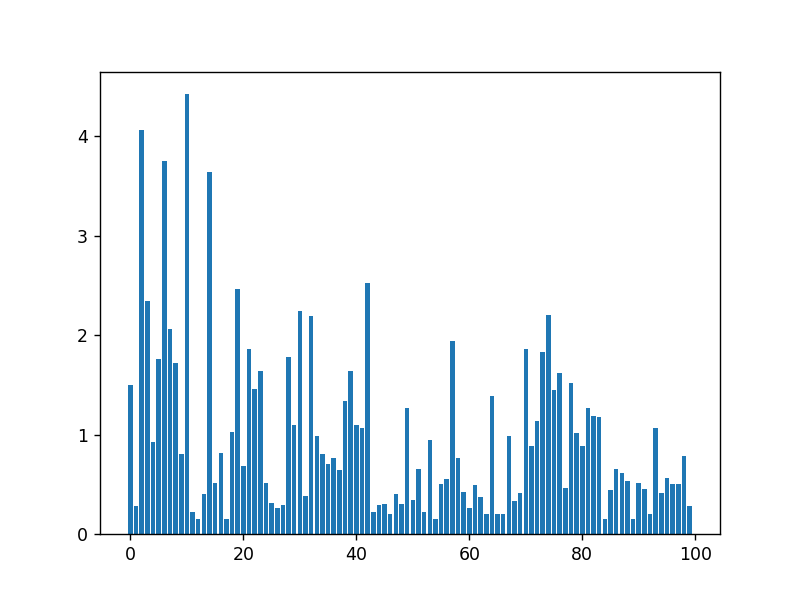

In [ ]:
# You may wish to view the PageRank graphically.
# This code will draw a bar chart, for each (numbered) website on the generated internet,
# The height of each bar will be the score in the PageRank.
# Run this code to see the PageRank for each internet you generate.
# Hopefully you should see what you might expect
# - there are a few clusters of important websites, but most on the internet are rubbish!
%pylab notebook
r = pageRank(generate_internet(100), 0.9)
plt.bar(arange(r.shape[0]), r);

# Implementation of TextRank

In [30]:
import re

import numpy as np
from nltk import sent_tokenize, word_tokenize

from nltk.cluster.util import cosine_distance

MULTIPLE_WHITESPACE_PATTERN = re.compile(r"\s+", re.UNICODE)


def normalize_whitespace(text):
    """
    Translates multiple whitespace into single space character.
    If there is at least one new line character chunk is replaced
    by single LF (Unix new line) character.
    """
    return MULTIPLE_WHITESPACE_PATTERN.sub(_replace_whitespace, text)


def _replace_whitespace(match):
    text = match.group()

    if "\n" in text or "\r" in text:
        return "\n"
    else:
        return " "


def is_blank(string):
    """
    Returns `True` if string contains only white-space characters
    or is empty. Otherwise `False` is returned.
    """
    return not string or string.isspace()


def get_symmetric_matrix(matrix):
    """
    Get Symmetric matrix
    :param matrix:
    :return: matrix
    """
    return matrix + matrix.T - np.diag(matrix.diagonal())


def core_cosine_similarity(vector1, vector2):
    """
    measure cosine similarity between two vectors
    :param vector1:
    :param vector2:
    :return: 0 < cosine similarity value < 1
    """
    return 1 - cosine_distance(vector1, vector2)


'''
Note: This is not a summarization algorithm. This Algorithm pics top sentences irrespective of the order they appeared.
'''


class TextRank4Sentences():
    def __init__(self):
        self.damping = 0.85  # damping coefficient, usually is .85
        self.min_diff = 1e-5  # convergence threshold
        self.steps = 100  # iteration steps
        self.text_str = None
        self.sentences = None
        self.pr_vector = None

    def _sentence_similarity(self, sent1, sent2, stopwords=None):
        if stopwords is None:
            stopwords = []

        sent1 = [w.lower() for w in sent1]
        sent2 = [w.lower() for w in sent2]

        all_words = list(set(sent1 + sent2))

        vector1 = [0] * len(all_words)
        vector2 = [0] * len(all_words)

        # build the vector for the first sentence
        for w in sent1:
            if w in stopwords:
                continue
            vector1[all_words.index(w)] += 1

        # build the vector for the second sentence
        for w in sent2:
            if w in stopwords:
                continue
            vector2[all_words.index(w)] += 1

        return core_cosine_similarity(vector1, vector2)

    def _build_similarity_matrix(self, sentences, stopwords=None):
        # create an empty similarity matrix
        sm = np.zeros([len(sentences), len(sentences)])

        for idx1 in range(len(sentences)):
            for idx2 in range(len(sentences)):
                if idx1 == idx2:
                    continue

                sm[idx1][idx2] = self._sentence_similarity(sentences[idx1], sentences[idx2], stopwords=stopwords)

        # Get Symmeric matrix
        sm = get_symmetric_matrix(sm)

        # Normalize matrix by column
        norm = np.sum(sm, axis=0)
        sm_norm = np.divide(sm, norm, where=norm != 0)  # this is ignore the 0 element in norm

        return sm_norm

    def _run_page_rank(self, similarity_matrix):

        pr_vector = np.array([1] * len(similarity_matrix))

        # Iteration
        previous_pr = 0
        for epoch in range(self.steps):
            pr_vector = (1 - self.damping) + self.damping * np.matmul(similarity_matrix, pr_vector)
            if abs(previous_pr - sum(pr_vector)) < self.min_diff:
                break
            else:
                previous_pr = sum(pr_vector)

        return pr_vector

    def _get_sentence(self, index):

        try:
            return self.sentences[index]
        except IndexError:
            return ""

    def get_top_sentences(self, number=5):

        top_sentences = []

        if self.pr_vector is not None:

            sorted_pr = np.argsort(self.pr_vector)
            sorted_pr = list(sorted_pr)
            sorted_pr.reverse()

            index = 0
            for epoch in range(number):
                sent = self.sentences[sorted_pr[index]]
                sent = normalize_whitespace(sent)
                top_sentences.append(sent)
                index += 1

        return top_sentences

    def analyze(self, text, stop_words=None):
        self.text_str = text
        self.sentences = sent_tokenize(self.text_str)

        tokenized_sentences = [word_tokenize(sent) for sent in self.sentences]

        similarity_matrix = self._build_similarity_matrix(tokenized_sentences, stop_words)

        self.pr_vector = self._run_page_rank(similarity_matrix)


text_str = '''
    Those Who Are Resilient Stay In The Game Longer *
    “On the mountains of truth you can never climb in vain: either you will reach a point higher up today, or you will be training your powers so that you will be able to climb higher tomorrow.” — Friedrich Nietzsche
    Challenges and setbacks are not meant to defeat you, but promote you. However, I realise after many years of defeats, it can crush your spirit and it is easier to give up than risk further setbacks and disappointments. Have you experienced this before? To be honest, I don’t have the answers. I can’t tell you what the right course of action is; only you will know. However, it’s important not to be discouraged by failure when pursuing a goal or a dream, since failure itself means different things to different people. To a person with a Fixed Mindset failure is a blow to their self-esteem, yet to a person with a Growth Mindset, it’s an opportunity to improve and find new ways to overcome their obstacles. Same failure, yet different responses. Who is right and who is wrong? Neither. Each person has a different mindset that decides their outcome. Those who are resilient stay in the game longer and draw on their inner means to succeed.
    '''

tr4sh = TextRank4Sentences()
tr4sh.analyze(text_str)
print(tr4sh.get_top_sentences(5))

['\nThose Who Are Resilient Stay In The Game Longer *\n“On the mountains of truth you can never climb in vain: either you will reach a point higher up today, or you will be training your powers so that you will be able to climb higher tomorrow.” — Friedrich Nietzsche\nChallenges and setbacks are not meant to defeat you, but promote you.', 'To be honest, I don’t have the answers.', 'To a person with a Fixed Mindset failure is a blow to their self-esteem, yet to a person with a Growth Mindset, it’s an opportunity to improve and find new ways to overcome their obstacles.', 'However, it’s important not to be discouraged by failure when pursuing a goal or a dream, since failure itself means different things to different people.', 'However, I realise after many years of defeats, it can crush your spirit and it is easier to give up than risk further setbacks and disappointments.']


**Conclusion - Implemented PAgeRank and TextRank Sucessfully.**